In [3]:
#!pip install tensorflow

  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-4.23.3-cp310-abi3-win_amd64.whl (422 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
     ---------------------------------------- 4.2/4.2 MB 12.9 MB/s eta 0:00:00
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
     -------------------------

In [1]:
# to check the gpu allocated
import tensorflow as tf
#tf.test.gpu_device_name()

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# downloading and loading the dataset directly from kaggle

!kaggle datasets download -d salader/dogs-vs-cats

Traceback (most recent call last):
  File "C:\Users\rssid\anaconda3.0\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\rssid\anaconda3.0\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\rssid\anaconda3.0\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "C:\Users\rssid\anaconda3.0\lib\site-packages\kaggle\__init__.py", line 23, in <module>
    api.authenticate()
  File "C:\Users\rssid\anaconda3.0\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 181, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\rssid\.kaggle. Or use the environment method.


In [1]:
# to unzip the downloaded file

import zipfile
zip = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip.extractall('/content')
zip.close()

FileNotFoundError: [Errno 2] No such file or directory: '/content/dogs-vs-cats.zip'

In [5]:
# importing the libraries

import tensorflow 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [6]:
# generators

train_data = tensorflow.keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

test_data = tensorflow.keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# normalize 

def normalize(image,label):
  tensorflow.cast(image/255.,tensorflow.float32)
  return image,label

train_data = train_data.map(normalize)
test_data = test_data.map(normalize)

In [8]:
# creating a CNN model

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
625/625 [==============================] - 79s 109ms/step - loss: 3.4539 - accuracy: 0.5422 - val_loss: 0.6709 - val_accuracy: 0.5946
Epoch 2/10
625/625 [==============================] - 59s 93ms/step - loss: 0.6921 - accuracy: 0.5550 - val_loss: 0.6985 - val_accuracy: 0.5508
Epoch 3/10
625/625 [==============================] - 61s 97ms/step - loss: 0.6754 - accuracy: 0.5617 - val_loss: 0.6936 - val_accuracy: 0.5402
Epoch 4/10
625/625 [==============================] - 60s 96ms/step - loss: 0.6432 - accuracy: 0.5957 - val_loss: 0.7271 - val_accuracy: 0.5356
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5947 - accuracy: 0.6463 - val_loss: 0.7454 - val_accuracy: 0.5554
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5300 - accuracy: 0.6922 - val_loss: 0.9052 - val_accuracy: 0.5594
Epoch 7/10
625/625 [==============================] - 63s 100ms/step - loss: 0.4966 - accuracy: 0.7142 - val_loss: 0.9130 - val_accur

In [13]:
#!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


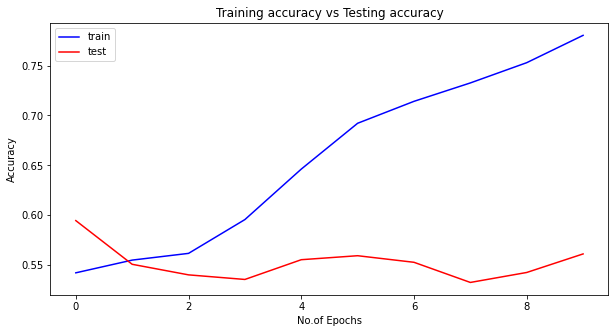

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='red',label='test')
plt.title('Training accuracy vs Testing accuracy')
plt.xlabel('No.of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Our model is Overfitted, so we need to apply some techniques like Data Augmentation or Batch Normalization or add Dropout Layer to avoid overfitting.

In [15]:
from keras.layers import BatchNormalization,Dropout

In [16]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                      

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history = model.fit(train_data,epochs=30,validation_data=test_data)

Epoch 1/30
625/625 [==============================] - 76s 119ms/step - loss: 1.0323 - accuracy: 0.5745 - val_loss: 0.6771 - val_accuracy: 0.5922
Epoch 2/30
625/625 [==============================] - 74s 117ms/step - loss: 0.6224 - accuracy: 0.6520 - val_loss: 0.6942 - val_accuracy: 0.6678
Epoch 3/30
625/625 [==============================] - 76s 121ms/step - loss: 0.6204 - accuracy: 0.6561 - val_loss: 0.5944 - val_accuracy: 0.6796
Epoch 4/30
625/625 [==============================] - 75s 119ms/step - loss: 0.5699 - accuracy: 0.7050 - val_loss: 0.5708 - val_accuracy: 0.7130
Epoch 5/30
625/625 [==============================] - 69s 110ms/step - loss: 0.5090 - accuracy: 0.7482 - val_loss: 0.6114 - val_accuracy: 0.7096
Epoch 6/30
625/625 [==============================] - 69s 110ms/step - loss: 0.4770 - accuracy: 0.7707 - val_loss: 0.5287 - val_accuracy: 0.7552
Epoch 7/30
625/625 [==============================] - 69s 109ms/step - loss: 0.4313 - accuracy: 0.7936 - val_loss: 0.4831 - val_ac

By adding Batch Normalizaion and Dropout layer, we somehow able to increase our Nueral networks accuracy.

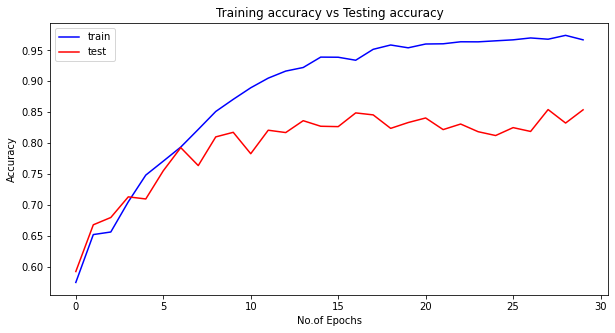

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='red',label='test')
plt.title('Training accuracy vs Testing accuracy')
plt.xlabel('No.of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

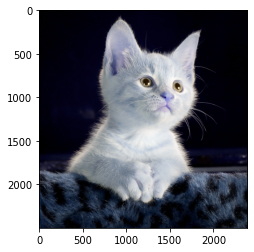

In [21]:
import cv2

test_img =cv2.imread('/content/cat_test_img1.jpg')
plt.imshow(test_img);

In [22]:
test_img.shape

(2500, 2392, 3)

In [23]:
# resizing our testing image to the size that we use to train our nueral network
test_img = cv2.resize(test_img,(256,256))

In [24]:
# here i am specifying that there is a one image with 3 channels 

test_input = test_img.reshape((1,256,256,3))

In [25]:
# this code will predict weather it is a cat or dog

img_pred = model.predict(test_input)
print(img_pred)
if img_pred >0.6:
  print('This is a Dog')
else:
  print('This is a Cat')

1/1 [==============================] - 0s 300ms/step
[[1.070671e-06]]
This is a Cat


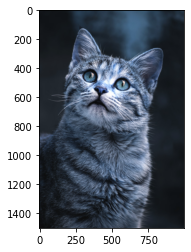

In [26]:
test_img2 =cv2.imread('/content/cat_test_img2.jpg')
plt.imshow(test_img2);

In [27]:
test_img2.shape

(1500, 1000, 3)

In [28]:
test_img2 = cv2.resize(test_img2,(256,256))

In [29]:
test_input2 = test_img2.reshape((1,256,256,3))

In [30]:
img_pred2 = model.predict(test_input2)
print(img_pred2)
if img_pred2 >0.5:
  print('This is a Dog')
else:
  print('This is a Cat')

1/1 [==============================] - 0s 16ms/step
[[0.4142395]]
This is a Cat


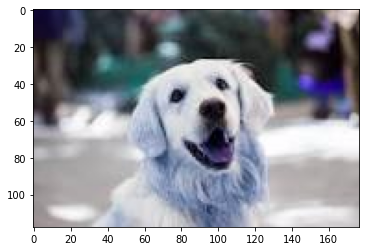

In [31]:
test_img3 =cv2.imread('/content/dog_test_img1.jpg')
plt.imshow(test_img3);

In [32]:
test_img3.shape

(118, 177, 3)

In [33]:
test_img3 = cv2.resize(test_img3,(256,256))

In [34]:
test_input3 = test_img3.reshape((1,256,256,3))

In [35]:
img_pred3 = model.predict(test_input3)
print(img_pred3)
if img_pred3 >0.5:
  print('This is a Dog')
else:
  print('This is a Cat')

1/1 [==============================] - 0s 14ms/step
[[0.99999976]]
This is a Dog
